In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [247]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [248]:
data.shape, test.shape

((8693, 14), (4277, 13))

In [249]:
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [250]:
data['Transported'] = data['Transported'].astype(int)
df = pd.concat([data, test], axis=0) # соединим данные для удобства

In [251]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,8693.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,0.503624
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [252]:
pd.DataFrame({'nan' : df.isnull().sum()}).T

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
nan,0,288,310,299,274,270,296,263,289,306,284,268,294,4277


In [253]:
df.duplicated().sum()

0

Много nan значений, нет дубликатов данных

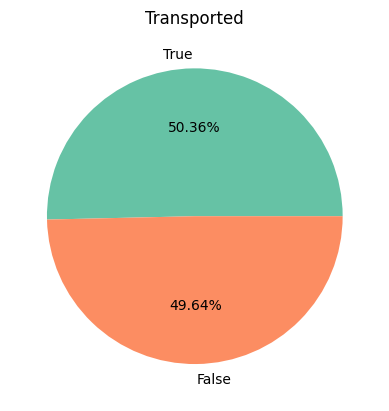

In [254]:
plt.pie(x=data['Transported'].value_counts(), labels=['True', 'False'], autopct='%.2f%%');
plt.title('Transported');

Равное распределение групп

# Data Visualization and Feature Engineering #

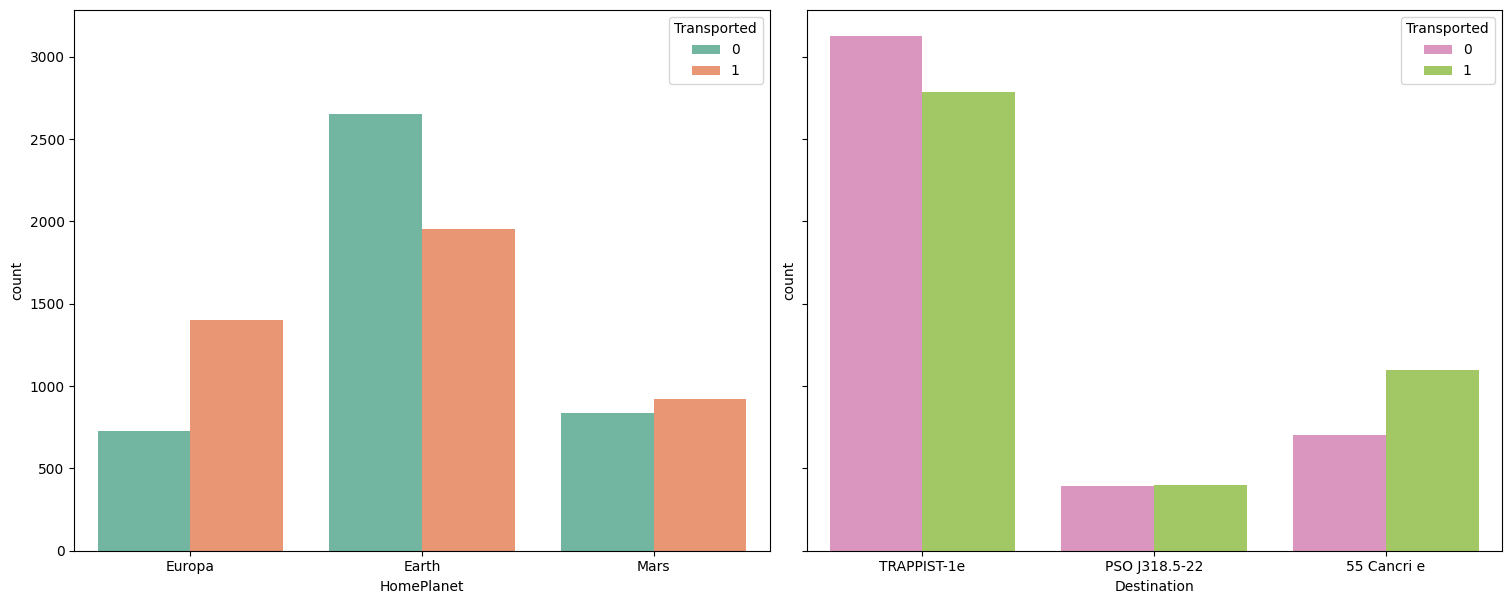

In [255]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), sharey=True)
fig.tight_layout()
sns.countplot(data=data, x='HomePlanet', hue='Transported', ax=ax[0]);
sns.countplot(data=data, x='Destination', hue='Transported', ax=ax[1], palette=['C3', 'C4']);

In [256]:
pd.DataFrame(data.groupby(['HomePlanet','Destination','Transported']).size()).T

HomePlanet        Earth                                                Europa  \
Destination 55 Cancri e      PSO J318.5-22      TRAPPIST-1e       55 Cancri e   
Transported           0    1             0    1           0     1           0   
0                   342  348           357  355        1894  1207         275   

HomePlanet                                                 Mars       \
Destination      PSO J318.5-22     TRAPPIST-1e      55 Cancri e        
Transported    1             0   1           0    1           0    1   
0            611             5  14         434  755          75  118   

HomePlanet                                      
Destination PSO J318.5-22     TRAPPIST-1e       
Transported             0   1           0    1  
0                      27  22         720  755

- Большинство людей направлялись на trappist-1e
- Чаще всего отправлялись с Земли

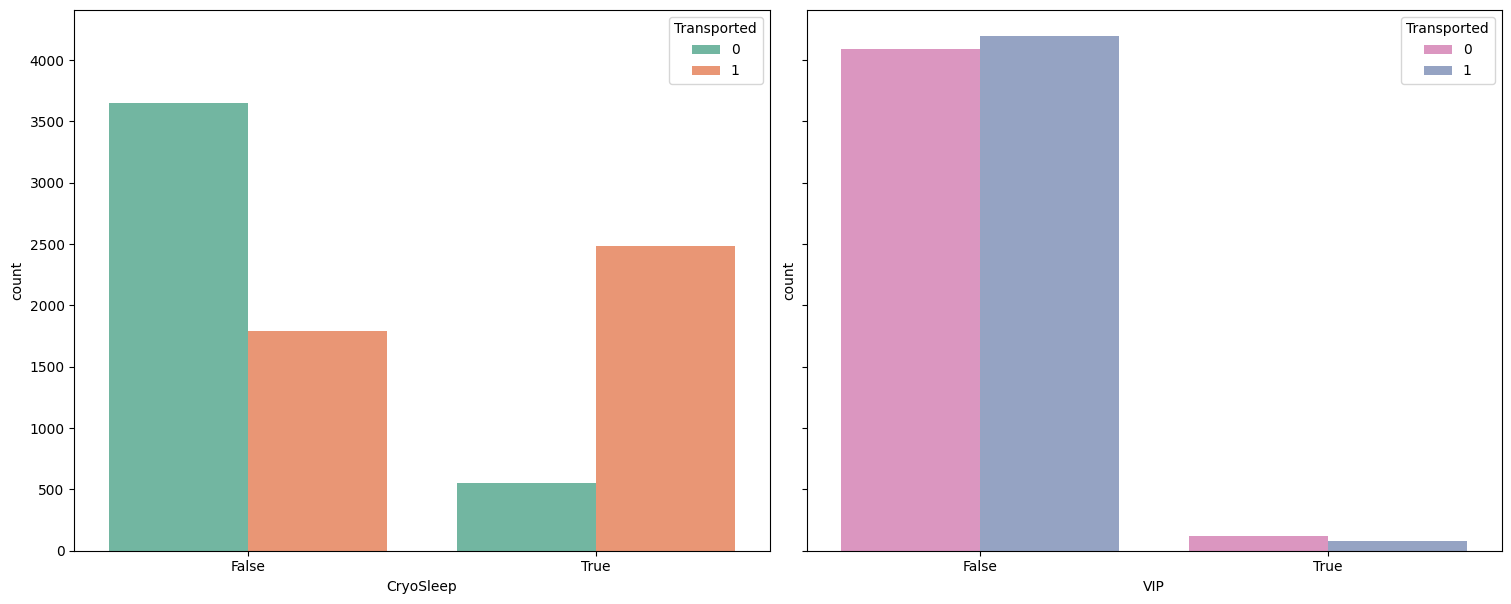

In [257]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), sharey=True)
fig.tight_layout()
sns.countplot(data=data, x='CryoSleep', hue='Transported', ax=ax[0]);
sns.countplot(data=data, x='VIP', hue='Transported', ax=ax[1], palette=['C3', 'C2']);

 - Находящиеся в криосне имели большую вероятность добраться до точки назначения
 - В независимости от наличия статуса VIP, пассажиры имели примерно равные шансы добраться и не добраться

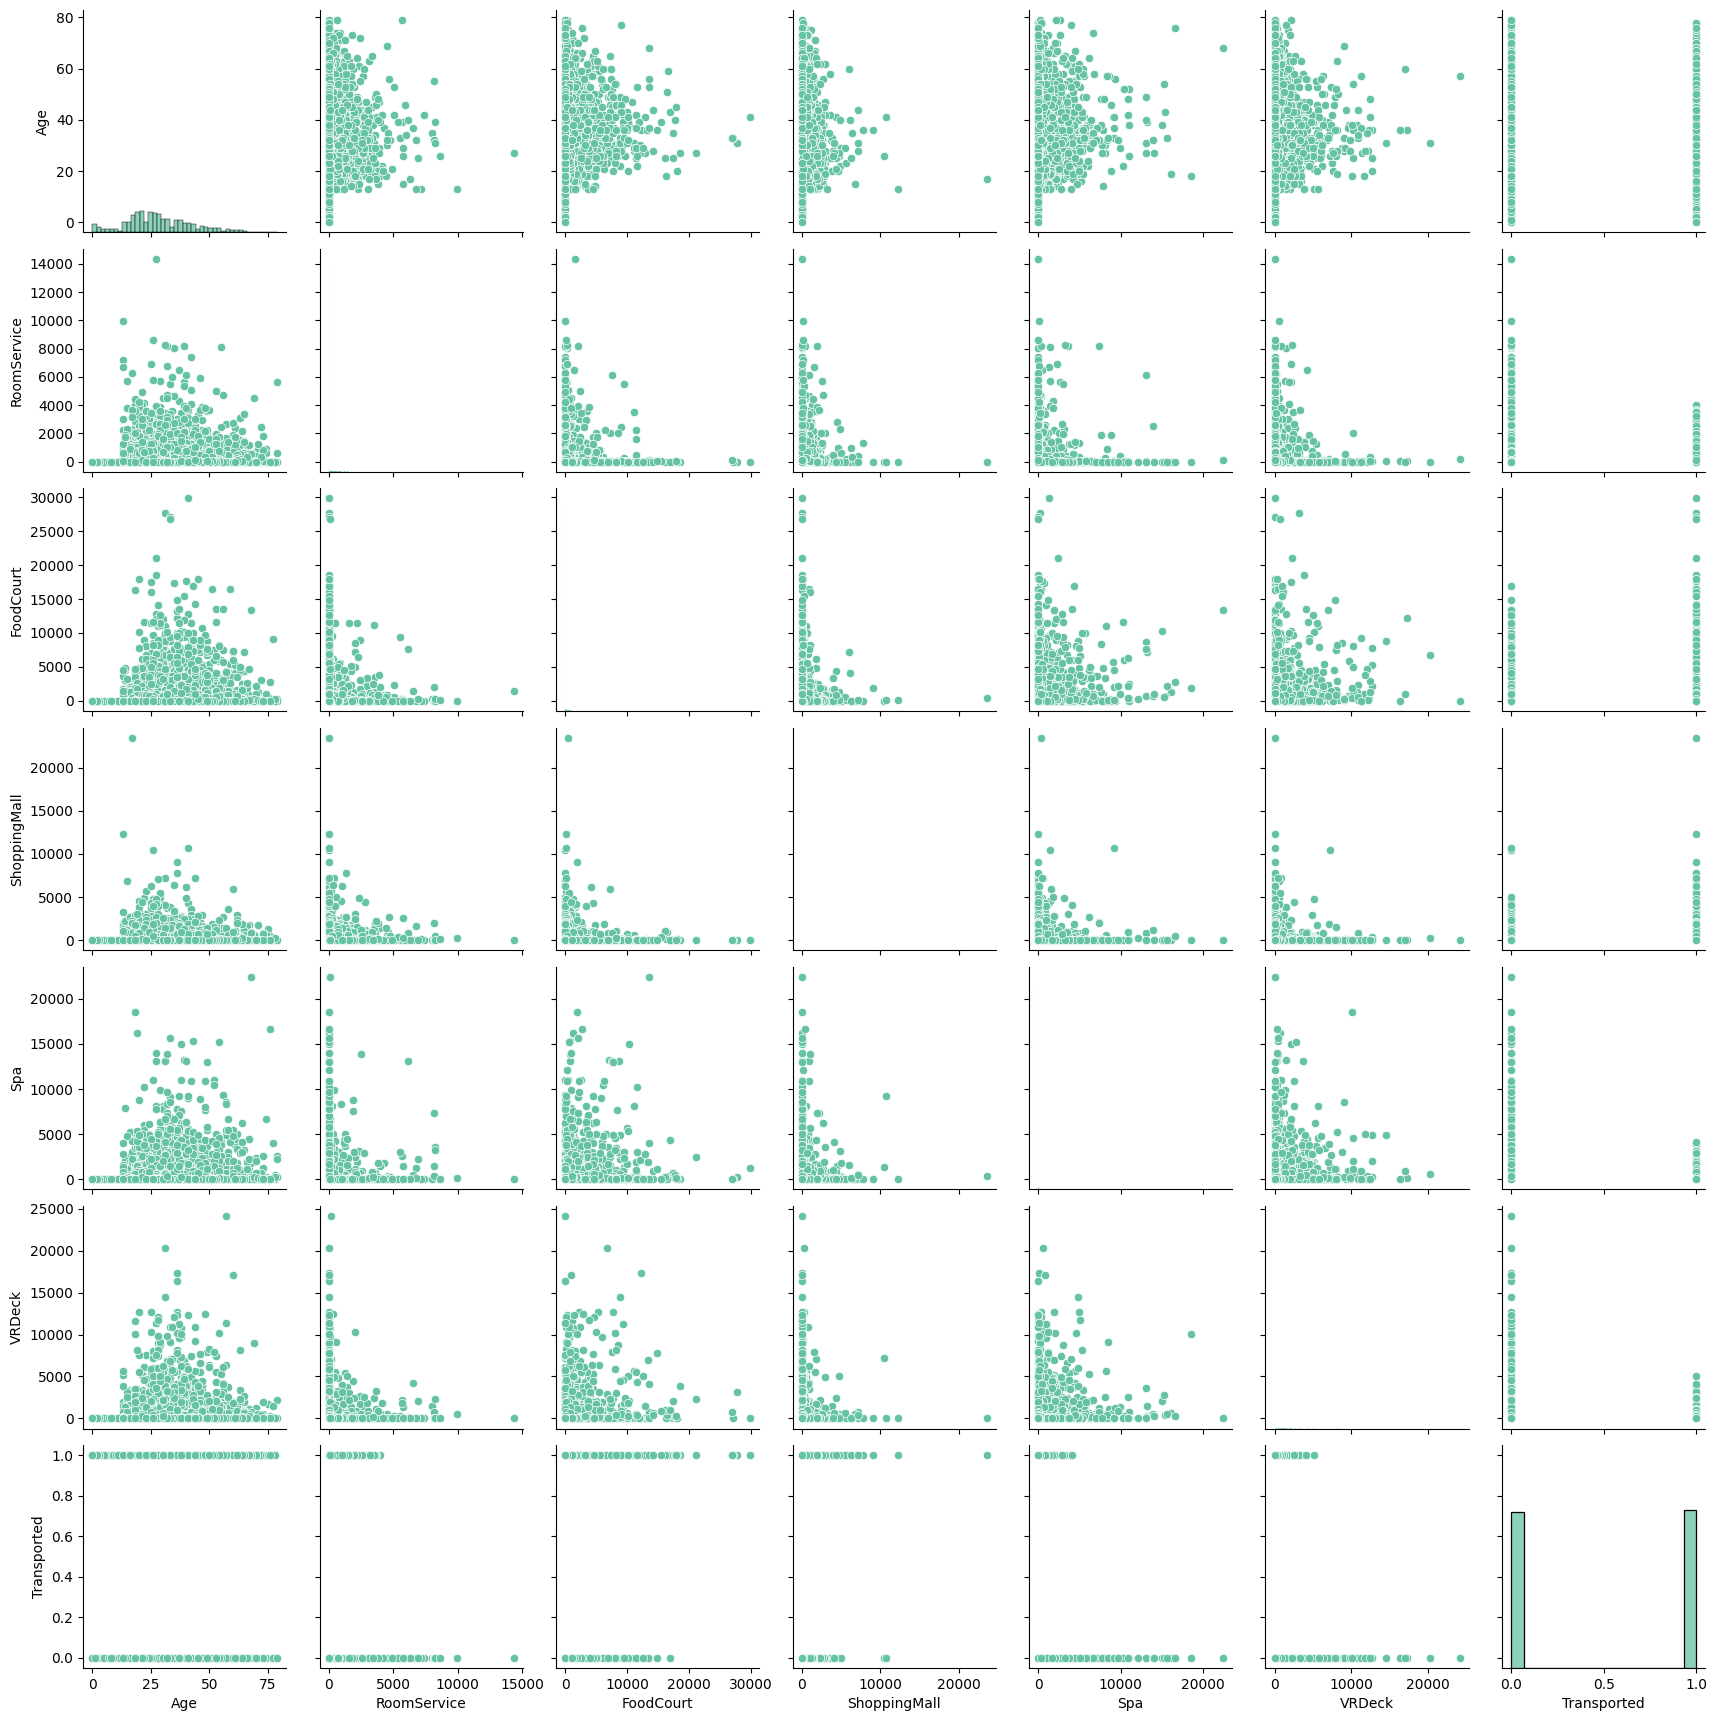

In [258]:
numeric_cols = data.select_dtypes(include = 'number').columns.tolist() # численные признаки
sns.pairplot(data[numeric_cols]);

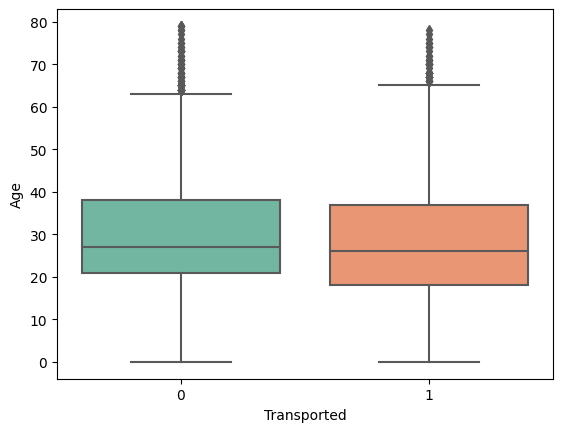

In [259]:
sns.boxplot(data=data, y='Age', x='Transported');

- Нет заметной зависимости между возрастом и результатом поездки
- Много выбросов

In [260]:
df[['Group', 'Id']] = data['PassengerId'].str.split('_', expand=True)

Создадим отдельные признаки для группы и id пассажира

In [261]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Id
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,0004,01


In [262]:
cur_data = df.dropna()

Посмотрим на датасет без nan-значений

In [263]:
cur_data.groupby('Group').agg({'HomePlanet' : 'nunique'})['HomePlanet'].unique()

array([1], dtype=int64)

In [264]:
cur_data.groupby('Group').agg({'Destination' : 'nunique'})['Destination'].unique()

array([1, 2, 3], dtype=int64)

- Люди из одной группы имеют одинаковые точки отправления, но разные точки прибытия

In [265]:
df['HomePlanet'].fillna(data['HomePlanet'].mode().iloc[0], inplace=True)
df['Destination'].fillna(data['Destination'].mode().iloc[0], inplace=True)

Заполним пустые значения HomePlanet и Destination наиболее частыми встречающимися значениями

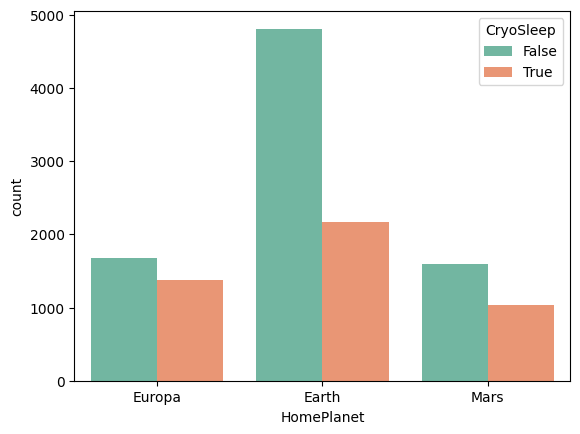

In [266]:
sns.countplot(data=df, x='HomePlanet', hue='CryoSleep');

In [267]:
df['CryoSleep'].fillna(False, inplace=True)

In [268]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

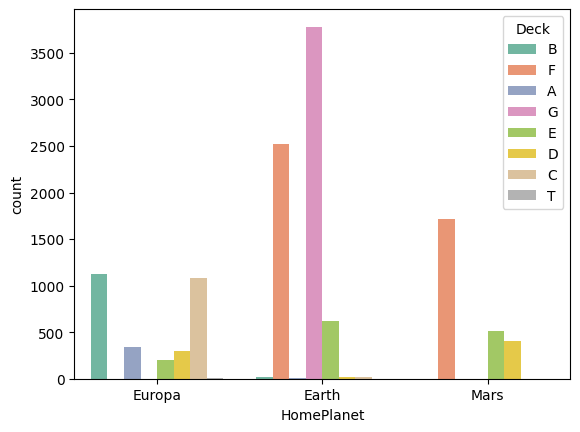

In [269]:
sns.countplot(data=df, x='HomePlanet', hue='Deck');

Связь между HomePlanet и Deck:
- Earth - чаще F, G, иногда E
- Europa - чаще B, C
- Mars - F

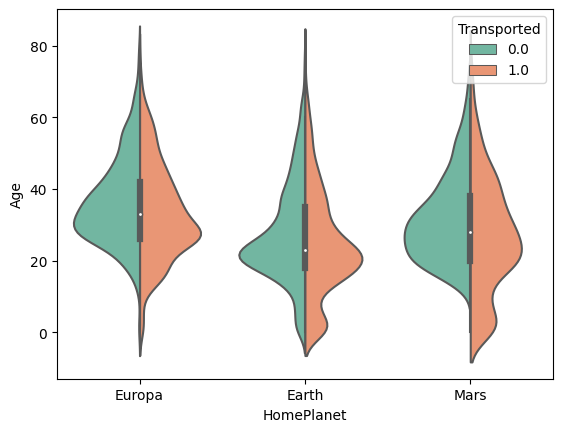

In [270]:
sns.violinplot(data=df, x='HomePlanet', y='Age', hue='Transported', split=True);

Выводы:
- Дети с Europa, Mars добрались до точки назначения
- Чаще добирались более молодые пассажиры
- Больше всего пассажиров в возрасте от 20 до 40 лет

In [271]:
df.loc[(df['Deck'].isna()) & (df['HomePlanet'] == 'Earth'), 'Deck'] = np.random.choice(['F', 'G'])

In [272]:
df.loc[(df['Deck'].isna()) & (df['HomePlanet'] == 'Mars'), 'Deck'] = 'F'
df.loc[(df['Deck'].isna()) & (df['HomePlanet'] == 'Europa'), 'Deck'] = np.random.choice(['B', 'C'])

In [273]:
df.Num.unique()

array(['0', '1', '2', ..., '1885', '1887', '1890'], dtype=object)

In [274]:
df['Num'].fillna(np.random.randint(0, 1894), inplace=True)

In [275]:
df.groupby(['Group'])['Side'].nunique().value_counts()

Side
1    4553
2    1625
0      39
Name: count, dtype: int64

Чаще у людей из одной группы одинаковая Side

In [276]:
df['Side'].fillna(df.groupby('Group')['Side'].transform('first'), inplace=True) 

Остальных заполним рандомным значением с равной вероятностью P и S

In [277]:
df['Side'].fillna(np.random.choice(['P', 'S'], p=[0.5, 0.5]), inplace=True)

### Посмотрим на категориальные признаки ###
- Возраст, траты на борту - используем label-encoding, так как уместна операция сравнения между группами
- Точки оправления, прибытия, deck и side места пассажира - one-hot encoding

In [278]:
df.Age.describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

In [279]:
df['AgeGroup'] = pd.cut(df['Age'].tolist(), 4)
df['AgeGroup'].unique()

[(19.75, 39.5], (39.5, 59.25], (-0.079, 19.75], (59.25, 79.0], NaN]
Categories (4, interval[float64, right]): [(-0.079, 19.75] < (19.75, 39.5] < (39.5, 59.25] < (59.25, 79.0]]

In [280]:
df.loc[df['Age'] <= 19.75, 'Age'] = 0
df.loc[(df['Age'] > 19.75) & (df['Age'] <= 39.5), 'Age'] = 1
df.loc[(df['Age'] > 39.5) & (df['Age'] <= 59.25), 'Age'] = 2
df.loc[(df['Age'] > 59.25) & (df['Age'] <= 80.0), 'Age'] = 3

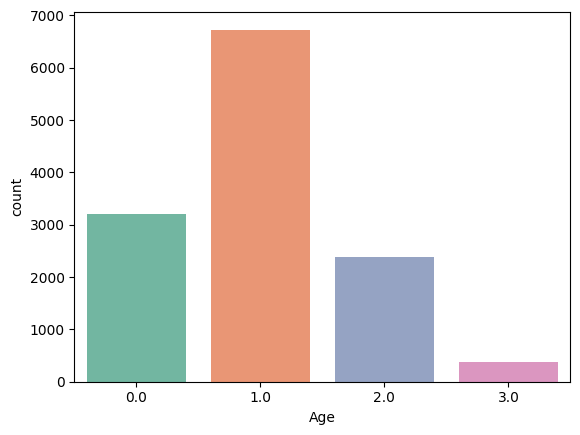

In [281]:
sns.countplot(df, x='Age');

- Большиснтво пассажиров относятся к первой возрастной группе

In [282]:
df['Age'].fillna(1, inplace=True)

Создадим общий признак для трат пассажира на борту

In [283]:
df['Bill'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

In [284]:
df['BillGroup'] = pd.cut(df['Bill'].tolist(), 4)
df['BillGroup'].unique()

[(-35.987, 8996.75], (8996.75, 17993.5], NaN, (26990.25, 35987.0], (17993.5, 26990.25]]
Categories (4, interval[float64, right]): [(-35.987, 8996.75] < (8996.75, 17993.5] < (17993.5, 26990.25] < (26990.25, 35987.0]]

In [285]:
df.loc[df['Bill'] <= 8996.75, 'Bill'] = 0
df.loc[(df['Bill'] > 8996.75) & (df['Bill'] <= 17993.5), 'Bill'] = 1
df.loc[(df['Bill'] > 17993.5) & (df['Bill'] <= 26990.25), 'Bill'] = 2
df.loc[(df['Bill'] > 26990.25) & (df['Bill'] <= 35987.0), 'Bill'] = 3

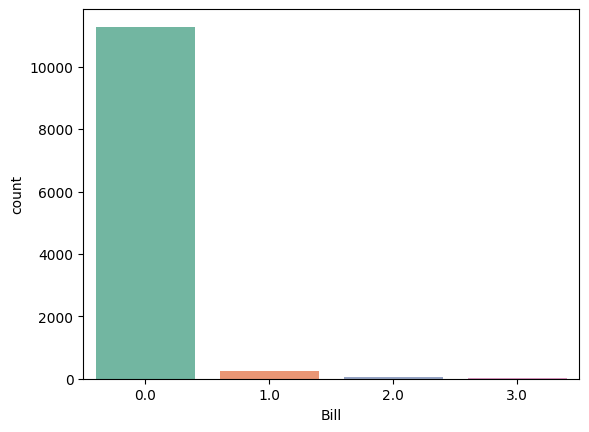

In [286]:
sns.countplot(df, x='Bill');

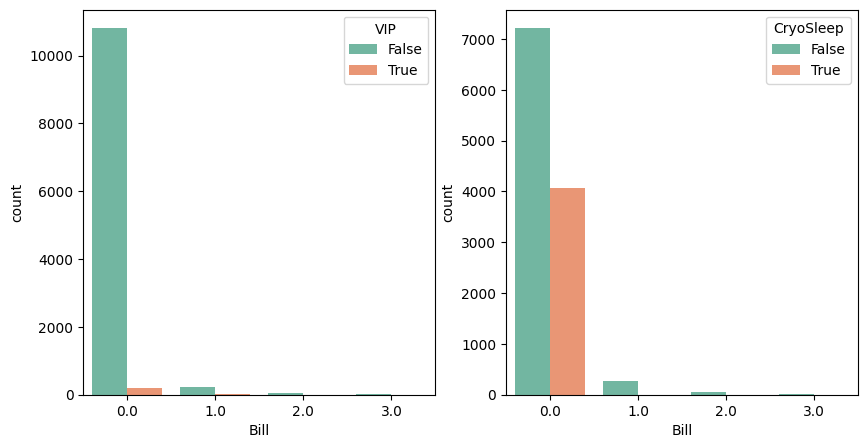

In [287]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=df, x='Bill', hue='VIP', ax=ax[0]);
sns.countplot(data=df, x='Bill', hue='CryoSleep', ax=ax[1]);

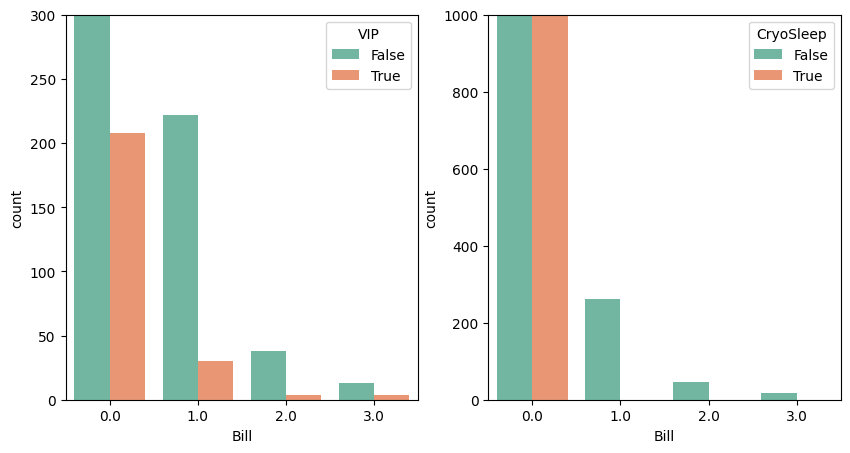

In [288]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=df, x='Bill', hue='VIP', ax=ax[0]);
sns.countplot(data=df, x='Bill', hue='CryoSleep', ax=ax[1]);

ax[0].set_ylim(0, 300);
ax[1].set_ylim(0, 1000);

- В основном у пассажиров нет VIP-статуса
- У находящихся в криосне пассажиров нулевой счет на борту

In [289]:
df['VIP'].fillna(False, inplace=True)

In [290]:
df[df['CryoSleep'] == True]['Bill'] = 0

In [291]:
df[['CryoSleep', 'VIP']] = df[['CryoSleep', 'VIP']].astype(int)

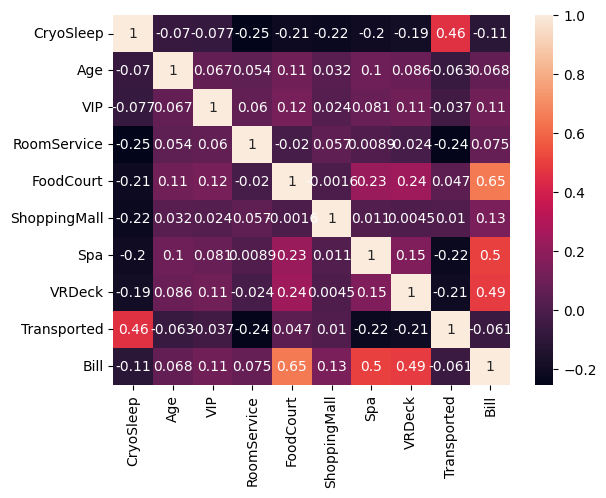

In [292]:
numeric_cols = df.select_dtypes(include = 'number').columns.tolist()
sns.heatmap(df[numeric_cols].corr(), annot=True);

Обработаем признаки трат на борту

In [293]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy = 'median')

In [294]:
luxury_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [295]:
for col in luxury_cols:
    df[col] = median_imputer.fit_transform(df[col].values.reshape(-1,1))

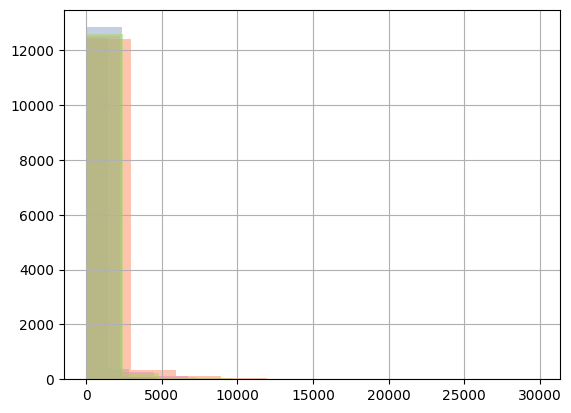

In [296]:
for col in luxury_cols:
    df[col].hist(alpha=0.5)

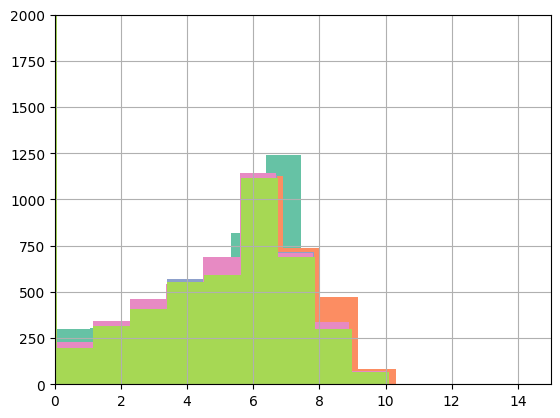

In [297]:
for col in luxury_cols:
    df.loc[df[col]==0, col] = 0.345
    np.log(df[col]).hist()
    df[col] = np.log(df[col])
    plt.xlim(0, 15)
    plt.ylim(0, 2000)

- Распределение логарифма близко к нормальному, в отличии от изначального распределения

## Machine Learning ##

In [298]:
PassengerIds = df['PassengerId'].iloc[data.shape[0]:]

In [299]:
df.drop(['Cabin', 'Name', 'AgeGroup', 'BillGroup', 'Id', 'PassengerId'], \
        axis=1, inplace=True)

In [300]:
df['Num'] = df['Num'].astype(int)

In [301]:
df['Group'] = df['Group'].astype(int)

In [302]:
df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True, dtype='int')

In [303]:
df['Bill'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

## Train Test Split ##

In [304]:
train_df, test_df = df.iloc[:data.shape[0]], df.iloc[data.shape[0]:]

In [305]:
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

In [306]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

## Логистическая регрессия ##

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
accuracy_score(train_pred, y_train), accuracy_score(y_val, val_pred)

(0.7644521138912856, 0.7814836112708453)

In [308]:
X_test = test_df.drop('Transported', axis=1)

In [309]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : model.predict(X_test).astype(bool)
                  })
subm_df.to_csv('submission.csv', index=False)

Kaggle Score - 0.778

## Попробуем другие модели ##

In [313]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, BaggingClassifier,
                              ExtraTreesClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [314]:
cat = CatBoostClassifier(verbose = False)
rfc = RandomForestClassifier(max_depth = 5, random_state=42)
dtc = DecisionTreeClassifier(max_depth=5)
abc = AdaBoostClassifier(random_state=42)
bc = BaggingClassifier(random_state=42)
gbdt = GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=500,subsample=0.5213,random_state=42)
xgb = XGBClassifier('binary:logistic',colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=4.5, reg_lambda=8.5,
                             subsample=0.5213,
                             random_state=42)
lgb = LGBMClassifier()

In [315]:
clfs = {
    'CBC':cat,
    'RF': rfc, 
    'DTC':dtc,
    'ABC':abc,
    'BC':bc,
    'GBDT':gbdt,
    'xgb':xgb,
    'LGB':lgb
}

In [316]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [317]:
from sklearn.model_selection import cross_val_score
for name, clf in clfs.items():
    print(f'for {name}, the cross_val_score is ') 
    print(np.mean(cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy', verbose=1)))
    print('-'*30)

for CBC, the cross_val_score is 
0.8111878520188881
------------------------------
for RF, the cross_val_score is 
0.7627278134358078
------------------------------
for DTC, the cross_val_score is 
0.7743744213830948
------------------------------
for ABC, the cross_val_score is 
0.7920619191203471
------------------------------
for BC, the cross_val_score is 
0.7802698746825689
------------------------------
for GBDT, the cross_val_score is 
0.7950822605754361
------------------------------
for xgb, the cross_val_score is 
0.8068723396552349
------------------------------
for LGB, the cross_val_score is 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2796, number of negative: 2767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

- Лучше всего себя показал catboost

In [318]:
model = CatBoostClassifier(verbose = False)
model.fit(X_train,y_train);

In [319]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : model.predict(X_test).astype(bool)
                  })
subm_df.to_csv('catboost.csv', index=False)

Kaggle Score - 0.7912

Подберем параметры для catboost

In [320]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'iterations': [200, 500, 800, 1000,1200],
    'learning_rate': [0.01, 0.1, 0.3],
    'border_count': [50, 100, 150,200],
    'depth': [4, 6, 8],
}

catboost = CatBoostClassifier(verbose = False)

randomize_search = RandomizedSearchCV(estimator=catboost, param_distributions=param_grid, cv=5)

randomize_search.fit(X_train, y_train)

best_params = randomize_search.best_params_
best_score = randomize_search.best_score_

best_catboost = CatBoostClassifier(**best_params)

best_catboost.fit(X_train, y_train);

0:	learn: 0.6885302	total: 9.24ms	remaining: 7.38s
1:	learn: 0.6827698	total: 20.4ms	remaining: 8.14s
2:	learn: 0.6777263	total: 31.9ms	remaining: 8.48s
3:	learn: 0.6731986	total: 41.1ms	remaining: 8.19s
4:	learn: 0.6680824	total: 52.7ms	remaining: 8.37s
5:	learn: 0.6624582	total: 61.9ms	remaining: 8.19s
6:	learn: 0.6582370	total: 70.2ms	remaining: 7.95s
7:	learn: 0.6538513	total: 80.9ms	remaining: 8.01s
8:	learn: 0.6493118	total: 92.4ms	remaining: 8.12s
9:	learn: 0.6444663	total: 102ms	remaining: 8.07s
10:	learn: 0.6411342	total: 114ms	remaining: 8.17s
11:	learn: 0.6367400	total: 124ms	remaining: 8.14s
12:	learn: 0.6324846	total: 134ms	remaining: 8.11s
13:	learn: 0.6286554	total: 144ms	remaining: 8.08s
14:	learn: 0.6249475	total: 154ms	remaining: 8.08s
15:	learn: 0.6212913	total: 165ms	remaining: 8.09s
16:	learn: 0.6174820	total: 175ms	remaining: 8.05s
17:	learn: 0.6145505	total: 184ms	remaining: 8s
18:	learn: 0.6117605	total: 194ms	remaining: 7.99s
19:	learn: 0.6078270	total: 204ms	r

In [321]:
best_cat_params = best_params

In [322]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : best_catboost.predict(X_test).astype(bool)
                  })
subm_df.to_csv('catboost_pred.csv', index=False)

Kaggle Score - 0.79775

In [323]:
from xgboost import XGBClassifier
param_grid = {
     'n_estimators': [900, 1000, 1100],
     'learning_rate': [0.01, 0.1, 0.3],
     'max_depth': [3, 5, 7],
     'subsample': [0.8, 0.9, 1.0],
     'colsample_bytree': [0.8, 0.9, 1.0],
     'reg_alpha': [0, 0.1, 0.5],
     'reg_lambda': [0, 0.1, 0.5]
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=10, cv=5)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=900, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [324]:
print(best_params)
print(best_score)

{'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
0.8050035945363048


In [325]:
best_xgb_params = best_params

In [326]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : best_xgb.predict(X_test).astype(bool)
                  })
subm_df.to_csv('xgbpred.csv', index=False)

Kaggle Score - 0.79331

### Voting classifier для моделей ###

In [327]:
from sklearn.ensemble import VotingClassifier

In [328]:
best_catboost = CatBoostClassifier(**best_cat_params)
best_xg = XGBClassifier(**best_xgb_params)

In [331]:
voting = VotingClassifier(estimators=[('cat', best_catboost), ('xg', best_xg)],voting='soft')
voting.fit(X_train,y_train)

0:	learn: 0.6885302	total: 7.79ms	remaining: 6.22s
1:	learn: 0.6827698	total: 15.2ms	remaining: 6.08s
2:	learn: 0.6777263	total: 21.6ms	remaining: 5.72s
3:	learn: 0.6731986	total: 28.7ms	remaining: 5.71s
4:	learn: 0.6680824	total: 35.3ms	remaining: 5.61s
5:	learn: 0.6624582	total: 42.1ms	remaining: 5.57s
6:	learn: 0.6582370	total: 50.2ms	remaining: 5.69s
7:	learn: 0.6538513	total: 57.2ms	remaining: 5.67s
8:	learn: 0.6493118	total: 64.2ms	remaining: 5.64s
9:	learn: 0.6444663	total: 70.3ms	remaining: 5.55s
10:	learn: 0.6411342	total: 77ms	remaining: 5.52s
11:	learn: 0.6367400	total: 82.9ms	remaining: 5.44s
12:	learn: 0.6324846	total: 88.9ms	remaining: 5.38s
13:	learn: 0.6286554	total: 95ms	remaining: 5.33s
14:	learn: 0.6249475	total: 101ms	remaining: 5.29s
15:	learn: 0.6212913	total: 107ms	remaining: 5.25s
16:	learn: 0.6174820	total: 113ms	remaining: 5.21s
17:	learn: 0.6145505	total: 119ms	remaining: 5.17s
18:	learn: 0.6117605	total: 126ms	remaining: 5.2s
19:	learn: 0.6078270	total: 133m

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x0000026004EAB6D0>),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=900, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [332]:
y_pred2 = voting.predict(X_val)
acc_final = accuracy_score(y_val,y_pred2)
print("Accuracy",acc_final)

Accuracy 0.8159861989649224


In [333]:
voting_pred = voting.predict(X_test)

In [334]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : voting.predict(X_test).astype(bool)
                  })
subm_df.to_csv('voting.csv', index=False)

Kaggle Score - 0.79214